# Basic Calculus
## Numerically differentiating and integrating

In this notebook you will learn how to work with _functions_, discretize, interpolate, inverse, differentiate and integrate _numerically_. Your first question might be, "Why? Since I know how to differentiate and integrate functions already." The simple answer is that the "function" you are integrating may be the result of complex previous calculations and therefore come in the form of an array, not a function.

* [Discretizing a function](#discretize)
* [Interpolation of data points](#interpolate)
* [Inverse of a function](#inverse)
* [Integrate](#integrate)
* [Differentiate](#differentiate)

## Step 1 - Discretizing a function. <a class="anchor" id="discretize">

We already did this step when we made plots. Often one of the first steps in solving a problem numerically is to _discretize_ the problem. (See [Discretization](https://en.wikipedia.org/wiki/Discretization)). At the most basic level, discretization involves choosing a starting point, an ending point and a step size. It seems easy enough, but there are _a lot_ of subtleties in this step. How small should the step size be? What starting point and ending point are safe? Both are especially problematic when working on a problem that goes from $-\infty$ to $\infty$, and is computationally intense! Any choice of discretization will introduce a discretization error. In advanced computational systems, often the step size is not constant, leading to "meshes". Though all this is complicated, we will not be spending time on these details.

### Discretization and scaling

One detail that we _do_ want to pay attention to: if you chose your start point, end point and step size correctly, your numerical answer will not change significantly if you change the choices by a small amount. Especially the step size can be sensitive. Often what is done is to choose a step size, do the computation, and then repeat it with a step size half as large. If the two computations agree, most likely little will be gained from going to an even smaller step size.

Here is a simple example. We take the $\cos(\theta)$ function and discretize it with different choices of step sizes and then plot the result.

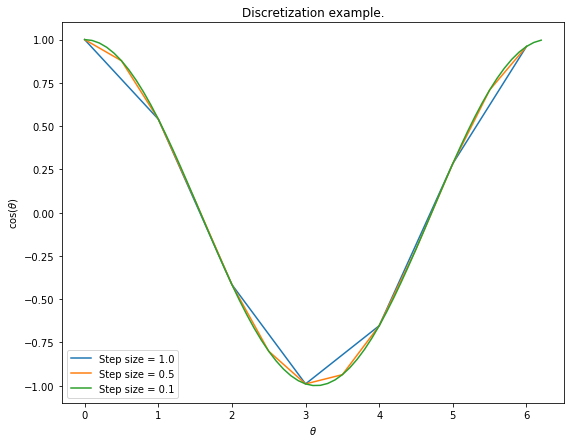

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

fig = plt.figure(figsize=(9,7))
ax  = fig.add_subplot(111)
ax.set_title("Discretization example.")
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\cos(\theta)$')
start = 0.
stop = 2*np.pi
for step_size in [1.,0.5,0.1]:
    x =  np.arange(start,stop,step_size)
    y =  np.cos(x)
    ax.plot(x,y,label="Step size = {}".format(step_size))

# ax.set_xlim(0.2,3.5)  # This allows you to zoom in on only 0.2 to 3.5
ax.legend()

You can clearly see in the plot that a stepsize of 1. is not "horrible" (What whould be? Try >3) we can see that the accuracy of the curve is visibly deteriorated. Even at 0.5 we can see discrete kinks, while at 0.1, _visually_ we seem to be doing OK. It will depend on the calculation we are trying to do whether that is accurate enough.

## Interpolation of data points <a class="anchor" id="interpolate">

When you have the actual mathematical function you want to plot, you can get all the accuracy you want by simply increasing the number of points that you are using in the discretization step. This is _not_ possible if you are plotting points from a data array, and it is not _practical_ or _time consuming_ to increase the number of steps. In those situations you sometimes need to [_interpolate_](https://en.wikipedia.org/wiki/Interpolation) the data points, i.e. compute a best estimate of values of the data in between the known points.

There are various methods to interpolate the data. The simplest method would be to "draw" a straight line between two data points and then "read off" the value of $y$ at the $x$ location of interest. This is the method that is called a "linear" interpolation. You would get more accurate results if you also took into account the points before and after the two points closest to where you are trying to evaluate, so you would "draw" a curved line instead of a straight one. That gets more complicated exactly how you would decide where the curved line goes, so there are several methods that you could use to do this kind of interpolation. 

You find the functions for interpolation in [scipy.interpolate] (https://docs.scipy.org/doc/scipy/reference/interpolate.html). The most common use would be either [interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d), or [splrep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html#scipy.interpolate.splrep) (spline representation) combined with [splev]() (spline evaluation). That latter method has the advantage that it will also compute derivatives.

We will take the cosine points at a step size of 1, and compare the different interpolation results below.

For interp1d, the documatation states that you supply arrays for x and y, and the function returns a function that you can call to get the interpolated values. You can give a `kind=` argument to select the type of interpolation. The `quadratic` and `cubic` kinds use the spline algorithm.

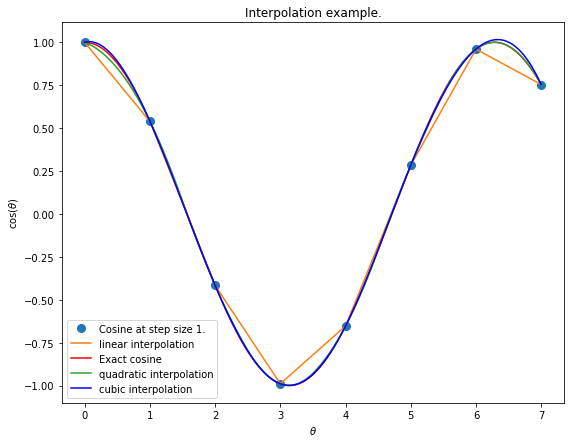

In [40]:
from scipy import interpolate
start = 0
stop  = 7                       # Choose an integer
fig = plt.figure(figsize=(9,7))
ax  = fig.add_subplot(111)
ax.set_title("Interpolation example.")
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\cos(\theta)$')
#
# Setup the data points to interpolate.
#
x =  np.arange(start,stop+1,1.)  # +1 so we do not try to interpolate outside the available points.
xf = np.arange(start,stop,0.001)  # Very fine steps for the interpolations
y =  np.cos(x)
yf =  np.cos(xf)  # The exact result
ax.plot(x,y,'o',markersize=8.,label="Cosine at step size 1.".format(step_size)) # Plot just dots.
ax.plot(xf,yf,label="Exact cosine",color="red")

f_linear = interpolate.interp1d(x,y,kind='linear')
y_linear = f_linear(xf)               # We have to evaluate the function at the xf points
ax.plot(xf,y_linear,label="linear interpolation")   

f_quad = interpolate.interp1d(x,y,kind='quadratic')
y_quad = f_quad(xf)
ax.plot(xf,y_quad,label="quadratic interpolation")

f_cubic = interpolate.interp1d(x,y,kind='cubic')
y_cubic = f_cubic(xf)
ax.plot(xf,y_cubic,label="cubic interpolation",color="blue")


ax.legend()

You can see that "linear" gives just a straight line connect the dots graph. The quadratic and cubic interpolations both do very well for a cosine shape, and the difference with the actual cosine becomes difficult to see.

#### You try:
Try to zoom in on the plot at various points so that the differences become obvious.

An nice alternative way to get the spline interpolations is the use of splrep and splev. These functions offer a number of extra options for smoothing and higher order splines. Below the same quadratic and cubic using these routines. 


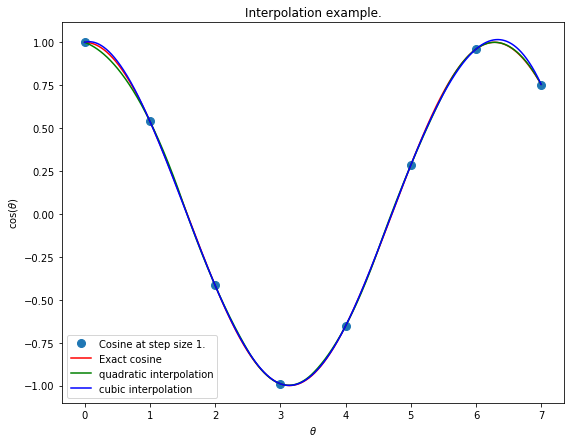

In [43]:
start = 0
stop  = 7                       # Choose an integer
fig = plt.figure(figsize=(9,7))
ax  = fig.add_subplot(111)
ax.set_title("Interpolation example.")
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\cos(\theta)$')
#
# Setup the data points to interpolate.
#
x =  np.arange(start,stop+1,1.)  # +1 so we do not try to interpolate outside the available points.
xf = np.arange(start,stop,0.001)  # Very fine steps for the interpolations
y =  np.cos(x)
yf =  np.cos(xf)  # The exact result
ax.plot(x,y,'o',markersize=8.,label="Cosine at step size 1.".format(step_size)) # Plot just dots.
ax.plot(xf,yf,label="Exact cosine",color="red")

quad_spline = interpolate.splrep(x,y,k=2)
y_quad = interpolate.splev(xf,quad_spline)
ax.plot(xf,y_quad,label="quadratic interpolation",color="green")

cube_spline = interpolate.splrep(x,y,k=3)
y_cube = interpolate.splev(xf,cube_spline)
ax.plot(xf,y_cube,label="cubic interpolation",color="blue")

ax.legend()

## Inverse of function <a class="anchor" id="inverse">

It is not always easy to find the mathematical expression for the inverse of a function. When this is the case, or if you need an inverse lookup for a set of data points, you can use interpolation the find the inverse simply by swapping $x$ and $y$. There are a couple of things to be careful about: 
* Make sure that you have singular results: by choosing the appropriate range in x so that each y occurs only once.
* Make sure that the y values are _increasing_ in value. If they are _decreasing_ reverse the array.

Below I will calculate the points at which $\cos(\theta)=0.5$ using an interpolated reverse lookup. 

In [51]:
import numpy as np
from scipy import interpolate
x = np.arange(0.,2*np.pi,0.01)
y = np.cos(x)
arg_min = np.argmin(y)      # Find the first index where y is minimum
arg_max = np.argmax(y[1:])  # First max after 0. We know 0 is the first max argument, so skip it.
print(arg_min,arg_max)
cos_inv1 = interpolate.interp1d(y[arg_min:0:-1],x[arg_min:0:-1],kind="cubic") # Cos is decreasing from 0 to arg_min, so reverse array.
cos_inv2 = interpolate.interp1d(y[arg_min:arg_max],x[arg_min:arg_max],kind="cubic")
print("Cos(x) = 0.5 for x={} and x={} ".format(cos_inv1(0.5)*180/np.pi,cos_inv2(0.5)*180/np.pi))

314 627
Cos(x) = 0.5 for x=60.00000000802273 and x=299.99999998897124 


This is of course a situation where you know the answer without any computation. Note that if you do not specify `kind="cubic"`, you will get linear interpolation and the results are not as accurate.

This trick of looking up the $x$ value corresponding to a specific $y$ value is useful for instance when trying the find the Full Width at Half Max of a peak _without_ doing a curve fit of that peak.

## Integrating a discretized function <a class="anchor" id="integrate">

Very often you will need to get the integral of your function over some range. The simplest solution to that is to just sum over all the points in the range and muliply by $\Delta x$, your step size. If you want a plot of the integral, you need to do this over and over for each point on the plot. The formula is:

$$ \int_{x_1}^{x_2} f(x) dx \rightarrow \sum_{i_1}^{i_2} x_i \Delta x $$
Where $x_1$ is the starting point, which corresponds to $x_{i_1}$ in the discretized space, and $x_2$ is the ending point, which corresponds to $x_{i_2}$ in the discretized space.

Let's try this in a brute force loop way, to illustrate the steps. First we compute the $\cos(\theta)$ curves for different steps, but this time we store them in a list. For each of the curve, we compute the integral from the lowest point to $x_i$, and then plot it.

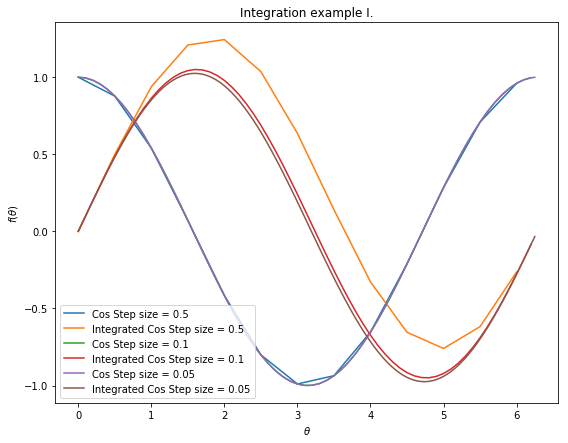

In [3]:
# Again, compute the different cosine approximation

fig = plt.figure(figsize=(9,7))
ax  = fig.add_subplot(111)
ax.set_title("Integration example I.")
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$f(\theta)$')
start = 0.
stop = 2*np.pi
steps = [0.5,0.1,0.05]
for step_size in steps:
    x = np.arange(start,stop,step_size)
    y = np.cos(x)
    ax.plot(x,y,label="Cos Step size = {}".format(step_size))

    y_int = np.zeros_like(y)  # An array of zeros the same size as y.
    # Now integrate y for each x:
    for ix in range(len(y)):
        y_sum = np.sum(y[0:ix])*step_size
        y_int[ix] = y_sum

    ax.plot(x,y_int,label="Integrated Cos Step size = {}".format(step_size))

ax.legend()

We can now see how for the stepsize of 0.5 the integration does not look so good, while the original $\cos$ looked fairly good. The difference between 0.1 and 0.05 seems more acceptable.

### Integrating Better

Clearly, you must be able to do better, but how? If you think about the steps of integrating, you could see that instead of simply adding the y values for each step, you could take into account the "trapezoid" of the current step and the next one (see [Trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule). You can look up how to program that yourself, but you don't have to because the scipy library already includes it as part of the package [spipy.integrate](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html).

There are several function that are part of the scipy.integrate package. If you know the functional form of the function you want to integrate, you can use integrate.quad() or integrate.quadrature or integrate.romberg. If you do not know, but have an array of data, you can use integrate.trapz, integrate.simps or integrate.romb.

So let's try again on our cosine function. Here is the same steps as we used before, but now using the improved algorithms.

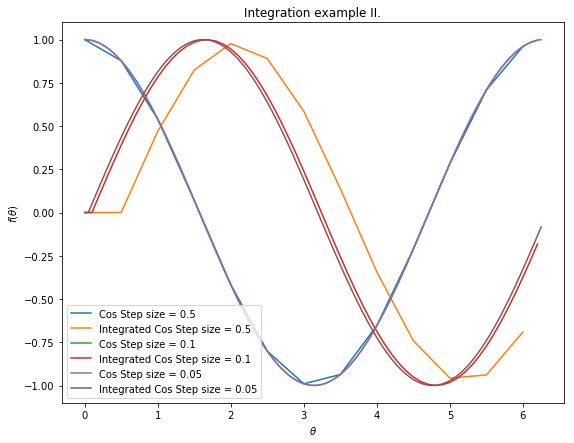

In [4]:
# Again, compute the different cosine approximation
import scipy.integrate as integrate
fig = plt.figure(figsize=(9,7))
ax  = fig.add_subplot(111)
ax.set_title("Integration example II.")
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$f(\theta)$')
start = 0.
stop = 2*np.pi
steps = [0.5,0.1,0.05]
for step_size in steps:
    x = np.arange(start,stop,step_size)
    y = np.cos(x)
    ax.plot(x,y,label="Cos Step size = {}".format(step_size))

    y_int = np.zeros_like(y)  # An array of zeros the same size as y.
    # Now integrate y for each x:
    for ix in range(0,len(y)):
        y_sum = integrate.trapz(y[0:ix],x[0:ix]) 
        # The x is given for the steps, which do not need to be equal sized.
        y_int[ix] = y_sum
    ax.plot(x,y_int,label="Integrated Cos Step size = {}".format(step_size))

ax.legend()

Here we note that this does _a little bit_ better for the 0.5 step size, but there is an interesting _feature_ (not a bug): the first step evaluates to zero! The reason for this is that you don't have a trapezoid for the very first step, and as a result the integration curves are all shifted by one. 

The plot looks better if we fix that shift, but then we loose the last point. The code below shows how you do this. 

Since this type of integration: data array in, data array (not just a single number) out, is so common, there is a single step function that you can use: cumtrapz. That routine also takes care of any shifting. On the plot below, those curves are added as well for comparison. You can see that there is a shift (the array is one shorter). Note the curves are on top of each other.

There is another method, called [Simpson's rule](https://en.wikipedia.org/wiki/Simpson%27s_rule) (sometimes called Keppler's rule), which is shown below. The difference is not perceptible for this data.

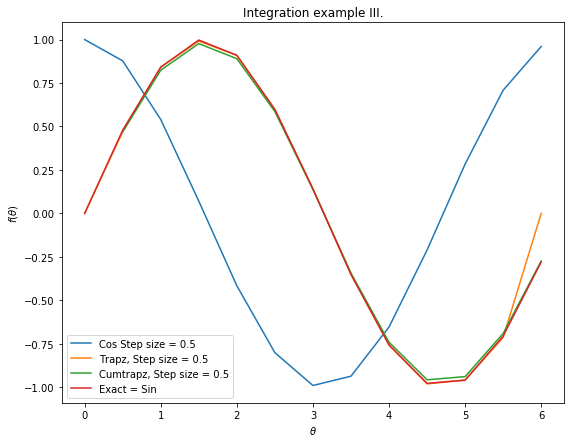

In [5]:
# Again, compute the different cosine approximation
fig = plt.figure(figsize=(9,7))
ax  = fig.add_subplot(111)
ax.set_title("Integration example III.")
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$f(\theta)$')
start = 0.
stop = 2*np.pi
steps = [0.5]
for step_size in steps:
    x = np.arange(start,stop,step_size)
    y = np.cos(x)
    ax.plot(x,y,label="Cos Step size = {}".format(step_size))

    y_int = np.zeros_like(y)  # An array of zeros the same size as y.
    # Now integrate y for each x:
    for ix in range(0,len(y)-1):                      # Because we shift, we are one point short.
        y_sum = integrate.simps(y[0:ix+1],x[0:ix+1])  # NOTE THE SHIFT 
        # The x is given for the steps, which do not need to be equal sized.
        y_int[ix] = y_sum
    ax.plot(x,y_int,label="Trapz, Step size = {}".format(step_size))
    y_int = integrate.cumtrapz(y,x)
    ax.plot(x[1:],y_int,label="Cumtrapz, Step size = {}".format(step_size))
    
    ax.plot(x,np.sin(x),label="Exact = Sin")
    
ax.legend()

## Differentiation <a class="anchor" id="differentiate">

Sometimes we want to take the derivative of the data rather than the integral. (Surprisingly, the integral is a far more common operation). From your calculus course, you learned that:

$$ \frac{d}{dx} f(x) = \lim_{\epsilon\rightarrow 0} \frac{f(x+\epsilon) - f(x)}{\epsilon} $$

For a discrete set of point, one cannot have $\epsilon\rightarrow0$, so we are stuck with:

$$ \frac{d}{dx} f(x_i) \approx \frac{\Delta f}{\Delta x} = \frac{ y[i+1] - y[i] }{x[i+1]-x[i]}$$

This is called a _forward_ difference. Since the step size is finite, it is slightly different from a _backward_ difference:

$$ \frac{d}{dx} f(x_i) \approx \frac{\Delta f}{\Delta x} = \frac{ y[i] - y[i-1] }{x[i]-x[i-1]}$$

You can also comput a _central difference_, but since you cannot use steps of $\frac{1}{2}\Delta x$, since that does not exist in our space. The central difference is then a combination of the previous two:
$$
\frac{d}{dx} f(x_i) \approx \frac{y[i+1] - y[i-1]}{x[i+1] - x[i-1]}
$$
This last one is a little more accurate than the first two.

To implement this, we can make a loop that takes differences. A faster way to do the same is to use the features of Numpy.

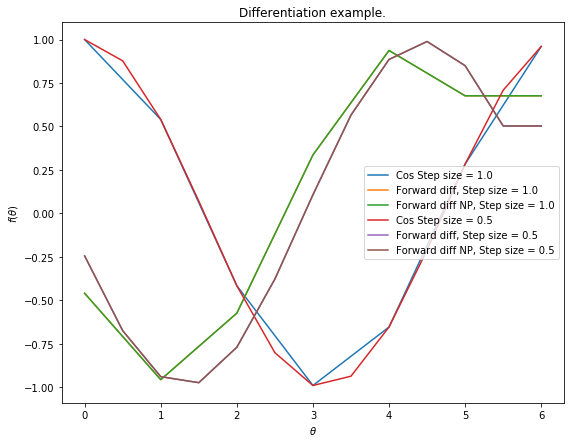

In [6]:
fig = plt.figure(figsize=(9,7))
ax  = fig.add_subplot(111)
ax.set_title("Differentiation example.")
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$f(\theta)$')
start = 0.
stop = 2*np.pi
steps = [1.0,0.5]
for step_size in steps:
    x = np.arange(start,stop,step_size)
    y = np.cos(x)
    ax.plot(x,y,label="Cos Step size = {}".format(step_size))

    y_diff = np.zeros_like(y)  # An array of zeros the same size as y.
    # Now take the difference of y for each x:
    for ix in range(0,len(y)-1):                      # Because we shift, we are one point short.
        dy = (y[ix+1]-y[ix]) /(x[ix+1]-x[ix])  # NOTE THE SHIFT 
        # The x is given for the steps, which do not need to be equal sized.
        y_diff[ix] = dy
    y_diff[-1] = (y[-1]-y[-2])/(x[-1]-x[-2])  # Use a backward difference for last point
    ax.plot(x,y_diff,label="Forward diff, Step size = {}".format(step_size))

    # This gives the EXAcT same result as above, but faster.
    dy = np.zeros_like(y)
    dy[0:-1] = np.diff(y)/np.diff(x)
    dy[-1] = (y[-1]-y[-2])/(x[-1]-x[-2])  # Use a backward difference for last point
    ax.plot(x,dy,label="Forward diff NP, Step size = {}".format(step_size))
    
ax.legend()

Note that for the derivative, we get trouble at the end point, even when we try to make the last point as a _backward_ difference.

So how can we do better? The only way to improve the derivate is to improve the _input data_ to the difference equations. There is a method for doing that, which is called "interpolation", which is finding the points _in between_ the ones in the data array by inference. The best that could possibly do would be to return a new array with a smaller step size, so why bother? Well, the interpolation routines are not very computationally expensive, and you may have situations where the input data for your computation is _very_ expensive. Think Lattice QCD.

For a derivative as we coded it up above, a linear interpolation will not do any better than what we started with, since the linear interpolation just connects the dots with a straight line. More complicated methods are well documented, and which is the _best_ one to use depends on the details of the data. Note that in our case, a cosine function is not a very demanding set of input data. 

You will find several methods for interpolation in [scipy.interpolate](https://docs.scipy.org/doc/scipy/reference/interpolate.html). Here we will just look at two methods for 1D interpolation. There are more, and everything can be extended in multiple dimensions.

The two methods we will look at here are "cubic" interpolation and "spline" interpolation.

**Note:** If you are not careful with interpolation, you can get some pretty wild results. You should _always_ check the interpolation step by plotting the results.

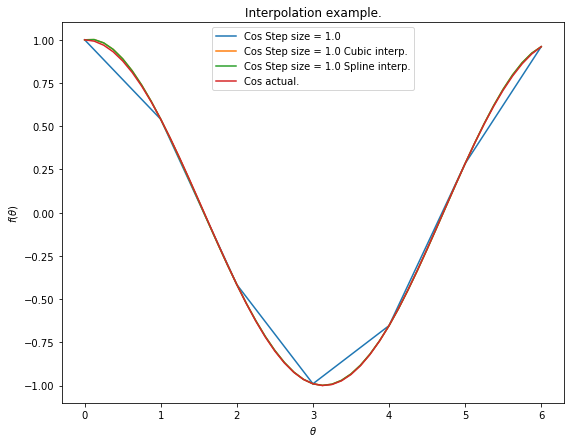

In [6]:
import scipy.interpolate as interpolate

fig = plt.figure(figsize=(9,7))
ax  = fig.add_subplot(111)
ax.set_title("Interpolation example.")
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$f(\theta)$')
start = 0.
stop = 2*np.pi
steps = [1.0]   # Only one step_size, so the plots don't get too messy.
for step_size in steps:
    x = np.arange(start,stop,step_size)
    y = np.cos(x)
    ax.plot(x,y,label="Cos Step size = {}".format(step_size))
   
    # Cubic interpolation.
    f_interp_c = interpolate.interp1d(x,y,kind="cubic") # This returns a *function* 
    
    x_new = np.arange(start,stop-2./8.,1./8.)  # A step 1/4 the previous size.
    y_new_c = f_interp_c(x_new)
    ax.plot(x_new,y_new_c,label="Cos Step size = {} Cubic interp.".format(step_size))
    # Spline interpolation
    spline_rep = interpolate.splrep(x,y)
    y_new_s = interpolate.splev(x_new,spline_rep)
    ax.plot(x_new,y_new_s,label="Cos Step size = {} Spline interp.".format(step_size))
    ax.plot(x_new,np.cos(x_new),label="Cos actual.".format(step_size))
    
ax.legend()

What we see is that we get remarkably close to the actual curve of a cosine. This will not always be the case. A sine or cosine type curve shape is easier to interpolate than some other functional forms. You should try other functions on your own.

We can now take the derivatives. It should be no surprise that these are much better for the interpolated data, as if the step size of the original was much smaller.

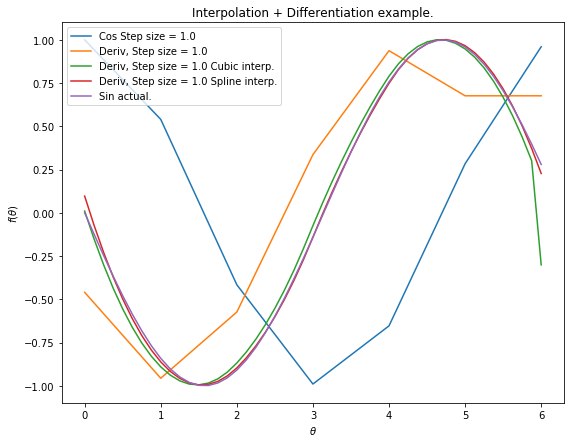

In [7]:
fig = plt.figure(figsize=(9,7))
ax  = fig.add_subplot(111)
ax.set_title("Interpolation + Differentiation example.")
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$f(\theta)$')
start = 0.
stop = 2*np.pi
steps = [1.0]
for step_size in steps:
    x = np.arange(start,stop,step_size)
    y = np.cos(x)
    ax.plot(x,y,label="Cos Step size = {}".format(step_size))
 
    dy = np.zeros_like(y)
    dy[0:-1] = np.diff(y)/np.diff(x)
    dy[-1] = (y[-1]-y[-2])/(x[-1]-x[-2])  # Use a backward difference for last point
    ax.plot(x,dy,label="Deriv, Step size = {}".format(step_size))

    # Cubic interpolation.
    f_interp_c = interpolate.interp1d(x,y,kind="cubic") # This returns a *function* 
    
    x_new = np.arange(start,stop-2./8.,1./8.)  # A step 1/4 the previous size.
    y_new_c = f_interp_c(x_new)
    dy_new_c = np.zeros_like(x_new)
    dy_new_c[0:-1] = np.diff(y_new_c)/np.diff(x_new)
    dy_new_c[-1] = (y_new_c[-1] - y_new_c[-2])/(x_new[-2]-x_new[-1])
    ax.plot(x_new,dy_new_c,label="Deriv, Step size = {} Cubic interp.".format(step_size))
    # Spline interpolation
    spline_rep = interpolate.splrep(x,y)
    dy_new_s = interpolate.splev(x_new,spline_rep,der=1) # First derivative in one step!
    ax.plot(x_new,dy_new_s,label="Deriv, Step size = {} Spline interp.".format(step_size))
    ax.plot(x_new, -np.sin(x_new),label="Sin actual.".format(step_size))
    
ax.legend()  # Simple difference.



What you see from these results is that both the cubic interpolation and the spline do very well. For the last point, the spline routine does better, since the internal routines are better handling the end points.

### Interpolation for integration

In case you were wondering, yes, you can use interpolation to improve the results of the intergration as well. The main advantage is that the plot will look smoother, and that the integration limits can differ from the actual points in the data. You can go beond the trapezoidal method for integration and get results similar to interpolation+integration.